<div class='alert alert-block' style='background-color: #ffffff; border: 1px solid #333333; border-radius: 10px; padding: 20px; text-align: center;'> <h1 style='font-family: Arial, sans-serif; color: #000000; font-size: 36px;'>MACHINE LEARNING</h1> <h2 style='font-family: Arial, sans-serif; color: #333333; font-size: 28px;'>MDSAA-BA Program</h2> <hr style='border: 1px solid #555555;'> <h3 style='font-family: 'Open Sans', sans-serif; color: #666666; font-size: 24px;'>To Grant Or Not To Grant Project 2024/2025</h3> </div>

## Table of contents

1. [Importing Libraries](#1.-Importing-Libraries)
2. [Importing the data](#2.-Importing-the-data)
3. [Exploring the data](#3.-Exploring-the-data)

## 1. Importing Libraries

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

<br>

## 2. Importing the data

The `display.max_columns` option controls the number of columns to be printed. By setting the `display.max_columns` option to `None`, Pandas will display all columns in the DataFrame.

In [353]:
# Displays all columns of the dataset
pd.set_option('display.max_columns', None)

In [354]:
train = pd.read_csv('train_explored.csv', index_col=0) #../Data/
test = pd.read_csv('test_explored.csv', index_col=0) #../Data/

<br>

## 3. Model Selection

Hold out method

In this approach we randomly split the complete data into training and test sets. Then we perform the model training on the training set and use the validation set for validation purpose. 80% of the data will be used for training purposes, while 20% for validation.

We first split between independent and dependent variables.

In [355]:
x = train.drop(columns= 'Claim Injury Type')
y = train['Claim Injury Type']

In [356]:
train_set, val_set, y_train, y_val = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=True,
                                                    stratify=y
                                                   )

<br>

##### 4.1 Addressing the inconsistencies found

##### 4.1.1 `Accident Date`

In order to have the different components of the date (year, month and day), we are going to split the column `Accident Date` into three columns. We then proceed to remove the column from the datasets.

In [357]:
train_set['Accident Date'] = pd.to_datetime(train_set['Accident Date'])
val_set['Accident Date'] = pd.to_datetime(val_set['Accident Date'])
test['Accident Date'] = pd.to_datetime(test['Accident Date'])

In [358]:
train_set['Accident Year'] = train_set['Accident Date'].apply(lambda x: x.year)
val_set['Accident Year'] = val_set['Accident Date'].apply(lambda x: x.year)
test['Accident Year'] = test['Accident Date'].apply(lambda x: x.year)

In [359]:
train_set = train_set.drop(columns = 'Accident Date')
val_set = val_set.drop(columns = 'Accident Date')
test = test.drop(columns = 'Accident Date')

One aspect that is important to check is if the age at injury aligns with the difference between the accident date and the birth year. We had already seen that the feature `Age at Injury` has inconsistent values, therefore this mismatch might occur.

In [360]:
train_set.apply(lambda row: row['Accident Year'] - row['Birth Year'] == row['Age at Injury'], axis=1).value_counts()

,count
False,240703
True,218517


From the output above, we can see that in 21 8517 claims, there is a misalignment between the calculated age and the recorded age at the time of injury.

In [361]:
(train_set['Accident Year'] - train_set['Birth Year'] - train_set['Age at Injury']).value_counts()

,count
0.0,218517
1.0,194511
-1.0,241
119.0,67
118.0,6
120.0,2


The output above illustrates the differences in ages calculated from the `Accident Year`, `Birth Year`, and `Age at Injury`. Most differences are minor, with the majority falling within a 1-year difference. However, there are also significant anomalies where some records show a difference of more than 100 years. Also, there is some values that cannot be calculated due to missing values in some of these columns.

Given the inconsistencies and missing values in the date related data, these issues will be addressed. Since, some rows have mismatch between the calculated age and the recorded age at the time of injury we update the age based on the accident year and birth year

In [362]:
train_set[train_set['Birth Year'].isna() & train_set['Accident Year'].notna() & train_set['Age at Injury'].notna()].head()

,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Accident Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,
5980545,31.0,N,2022-05-02,N,3.063832,NaN,2022-04-30,NaN,HEALTH & HOSPITAL CORP.,3A. SELF PUBLIC,BRONX,N,NYC,2023-01-09,F,0.0,62.0,IV,99.0,1.0,-9.0,10451,0.0,2.0,2022.0
5488794,31.0,N,2020-05-29,N,0.000000,NaN,2020-06-08,2020-05-20,STARR SPECIALTY INSURANCE,1A. PRIVATE,SUFFOLK,N,HAUPPAUGE,NaN,M,0.0,54.0,UK,45.0,52.0,34.0,34482,0.0,6.0,2019.0
5469588,33.0,N,2020-04-21,Y,3.213783,NaN,2020-05-21,2020-04-08,"POLICE, FIRE, SANITATION",3A. SELF PUBLIC,RICHMOND,N,NYC,2021-09-27,M,1.0,92.0,IV,27.0,10.0,31.0,10308,0.0,6.0,2020.0
5614437,25.0,N,2020-12-10,Y,3.132935,NaN,2020-12-18,2020-11-03,FEDERAL INSURANCE COMPANY,1A. PRIVATE,ERIE,N,BUFFALO,2021-03-09,M,1.0,71.0,UK,98.0,80.0,90.0,02370,0.0,6.0,2019.0
5458247,59.0,N,2020-03-24,N,0.000000,NaN,2020-03-24,NaN,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WESTCHESTER,N,NYC,NaN,M,0.0,23.0,III,53.0,59.0,33.0,10587,0.0,3.0,2018.0


There are some rows, that eventhough there are no values in the feature `Birth Year`, we can find based on the values in `Age at Injury` and `Accident Year`.

In [363]:
train_set.loc[train_set['Birth Year'].isna() & train_set['Accident Year'].notna() & train_set['Age at Injury'].notna(), 'Birth Year'] = (
    train_set['Accident Year'] - train_set['Age at Injury'])

In [364]:
val_set.loc[val_set['Birth Year'].isna() & val_set['Accident Year'].notna() & val_set['Age at Injury'].notna(), 'Birth Year'] = (
    val_set['Accident Year'] - val_set['Age at Injury'])

Some rows have the same year in `Accident Year` and `Birth Year` and that is inconsistent. Based on that, the values in `Birth Year` will be replaced as missing.

In [365]:
train_set[train_set["Birth Year"] == train_set["Accident Year"]].head(5)

,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Accident Year
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,
5721908,0.0,N,2021-05-14,N,0.0,2021.0,NaN,NaN,AMERICAN GUAR & LIAB INS CO,1A. PRIVATE,CHENANGO,N,BINGHAMTON,NaN,F,0.0,0.0,I,0.0,0.0,0.0,13815,0.0,5.0,2021.0
5578131,0.0,N,2020-10-15,N,0.0,2020.0,2020-08-14,NaN,"GENERAL MOTORS, LLC",4A. SELF PRIVATE,NIAGARA,N,BUFFALO,NaN,F,0.0,0.0,I,99.0,59.0,38.0,NaN,0.0,5.0,2020.0
5482425,0.0,N,2020-05-15,N,NaN,2020.0,NaN,NaN,STATE INSURANCE FUND,2A. SIF,DUTCHESS,N,ALBANY,NaN,F,0.0,61.0,II,0.0,0.0,0.0,12601,0.0,1.0,2020.0
5708974,0.0,N,2021-04-27,N,0.0,2021.0,2021-04-23,NaN,GREAT NECK UNION FREE,3A. SELF PUBLIC,NASSAU,N,NYC,NaN,F,0.0,0.0,IV,74.0,10.0,17.0,11021,0.0,5.0,2021.0
5564192,0.0,N,2020-09-23,Y,0.0,2020.0,NaN,2020-08-20,STATE INSURANCE FUND,2A. SIF,NEW YORK,N,NYC,NaN,F,0.0,62.0,IV,0.0,0.0,0.0,11356,0.0,2.0,2020.0


In [366]:
train_set.loc[train_set["Birth Year"] == train_set["Accident Year"], "Birth Year"] = np.nan

In [367]:
val_set.loc[val_set["Birth Year"] == val_set["Accident Year"], "Birth Year"] = np.nan

Since, some rows have the age at injury different from the difference between the birth year and the year of the accident, those will be updated.

In [368]:
train_set['Age at Injury'] = train_set['Accident Year'] - train_set['Birth Year']

In [369]:
val_set['Age at Injury'] = val_set['Accident Year'] - val_set['Birth Year']

In [370]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
import numpy as np

output_notebook()

cleaned_age = train_set['Age at Injury'].dropna()

hist, edges = np.histogram(cleaned_age, bins=40)

p = figure(title='Histogram of Age at Injury')

p.quad(
    top=hist,
    bottom=0,
    left=edges[:-1],
    right=edges[1:],
    fill_color='#FF8C00',
    line_color='black',
    line_width=1
)

# Display the plot in the notebook
show(p)

<br>

#### 4.1.2. `Zip Code`

As previously mentioned, there were some Zip codes that were inconsistent, therefore we will address them.

In [371]:
len(train_set["Zip Code"].unique())

9135

In [372]:
len(train_set[train_set["Zip Code"] == '10567'])

406

In [373]:
len(train_set[train_set["Zip Code"] == 10567.0])

0

The `fix_zip_code` function standardizes zip codes by converting any float values to integers and then back to strings. This ensures consistent formatting across all zip code entries.

In [374]:
def fix_zip_code(x):
    if isinstance(x, float) and x.is_integer():
        return str(int(x))[:5]
    if isinstance(x, str) and x.isnumeric():
        return str(int(x))[:5]
    try:
        return(str(int(x))[:5])
    except:
        warnings.warn("x cannot be turned into a string of 5 characters", UserWarning)

In [375]:
train_set['Zip Code'] = train_set['Zip Code'].apply(fix_zip_code)
val_set['Zip Code'] = val_set['Zip Code'].apply(fix_zip_code)

<ipython-input-374-5cbbda973fca>:9: UserWarning: x cannot be turned into a string of 5 characters
  warnings.warn("x cannot be turned into a string of 5 characters", UserWarning)


Checking if it worked.

In [376]:
len(train_set["Zip Code"].unique())

7304

In [377]:
len(train_set[train_set["Zip Code"] == '10567'])

406

In [378]:
len(train_set[train_set["Zip Code"] == 10567.0])

0

Now, the values for the `Zip Code` feature are standardized.

<br>

##### 4.2 Feature engineering

*Dummy Features*

To create binary indicators for whether each form was received, we'll define new columns: `Received_Employer_report` and `Received_employee_claim`. Each will be set to 1 if the corresponding date is present, and 0 if it's missing (already replaced with 0).

In [379]:
train_set["Received_C2"] = train_set["C-2 Date"].apply(lambda x: 1 if x != 0 else 0)
val_set["Received_C2"] = val_set["C-2 Date"].apply(lambda x: 1 if x != 0 else 0)
test["Received_C2"] = test["C-2 Date"].apply(lambda x: 1 if x != 0 else 0)

In [380]:
train_set["Received_C3"] = train_set["C-3 Date"].apply(lambda x: 1 if x != 0 else 0)
val_set["Received_C3"] = val_set["C-3 Date"].apply(lambda x: 1 if x != 0 else 0)
test["Received_C3"] = test["C-3 Date"].apply(lambda x: 1 if x != 0 else 0)

The same will be applied to indicate if a hearing was held. We'll create a new column, `Hearing_held`, set to 1 if the `First Hearing Date` happened and 0 if did not (already replaced with 0).

In [381]:
train_set["Hearing_held"] = train_set["First Hearing Date"].apply(lambda x: 1 if x != 0 else 0)
val_set["Hearing_held"] = val_set["First Hearing Date"].apply(lambda x: 1 if x != 0 else 0)
test["Hearing_held"] = test["First Hearing Date"].apply(lambda x: 1 if x != 0 else 0)

<br>

*Categorical encoding*

In this step, we are going to encode some columns using the One Hot Encoder.

Some features that are binary categorical variables, like yes (Y) and no (N), we will convert it to 0 and 1. One of them will be discarded.

In [382]:
# Check columns in each dataframe
print("Train columns:", list(train_set.columns))
print("Validation columns:", list(val_set.columns))
print("Test columns:", list(test.columns))

Train columns: ['Age at Injury', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code', 'Agreement Reached', 'Number of Dependents', 'Accident Year', 'Received_C2', 'Received_C3', 'Hearing_held']
Validation columns: ['Age at Injury', 'Alternative Dispute Resolution', 'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage', 'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type', 'County of Injury', 'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Co

In [383]:
train_set = pd.get_dummies(train_set, columns=['Attorney/Representative', 'COVID-19 Indicator','Alternative Dispute Resolution', 'Gender'], drop_first=True, dtype=int)
val_set = pd.get_dummies(val_set, columns=['Attorney/Representative', 'COVID-19 Indicator','Alternative Dispute Resolution', 'Gender'], drop_first=True, dtype=int)
test = pd.get_dummies(test, columns=['Attorney/Representative', 'COVID-19 Indicator','Alternative Dispute Resolution', 'Gender'], drop_first=True, dtype=int)

In [384]:
train_set.describe()

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents,Accident Year,Received_C2,Received_C3,Hearing_held,Attorney/Representative_Y,COVID-19 Indicator_Y,Alternative Dispute Resolution_U,Alternative Dispute Resolution_Y,Gender_M,Gender_U,Gender_X
count,454937.000000,436252.000000,457490.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,456261.000000,459220.0,459220.0,459220.0,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000,459220.000000
mean,42.954398,1.160236,1977.823749,0.742178,57.624263,52.915609,39.930595,38.592104,0.046470,3.003952,2020.828026,1.0,1.0,1.0,0.316735,0.048116,0.000011,0.004503,0.584193,0.008144,0.000076
std,13.753604,1.474836,13.860449,1.924955,20.920515,27.006646,22.892690,23.053490,0.210501,2.000465,1.856728,0.0,0.0,0.0,0.465204,0.214012,0.003300,0.066955,0.492861,0.089877,0.008730
min,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,1961.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1966.000000,0.000000,44.000000,29.000000,10.000000,32.000000,0.000000,1.000000,2020.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.000000,1978.000000,0.000000,61.000000,56.000000,49.000000,38.000000,0.000000,3.000000,2021.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,54.000000,2.926517,1989.000000,0.000000,62.000000,75.000000,52.000000,53.000000,0.000000,5.000000,2022.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.000000,6.451492,2018.000000,73.000000,92.000000,99.000000,91.000000,99.000000,1.000000,6.000000,2023.000000,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [385]:
print(train_set['Attorney/Representative_Y'].unique())

[1 0]


<br>Defining the columns to encode.

In [386]:
# train_set.drop(columns='Alternative Dispute Resolution_U', inplace=True)
# val_set.drop(columns='Alternative Dispute Resolution_U', inplace=True)
# test.drop(columns='Alternative Dispute Resolution_U', inplace=True)

In [387]:
train_set.drop(columns='Gender_U', inplace=True, errors='ignore')
val_set.drop(columns='Gender_U', inplace=True, errors='ignore')
test.drop(columns='Gender_U', inplace=True, errors='ignore')
train_set.drop(columns='Gender_X', inplace=True, errors='ignore')
val_set.drop(columns='Gender_X', inplace=True, errors='ignore')
test.drop(columns='Gender_X', inplace=True, errors='ignore')

In [388]:
# columns_to_encode = []#'Alternative Dispute Resolution', 'Gender'

Initializing the encoder and fitting it on the training set. This encoder will learns the unique categories present in the training set.

In [389]:
# encoder = OneHotEncoder(sparse_output=False)
# one_hot_encoded = encoder.fit(train_set[columns_to_encode])

Transforming the `train_set`, `val_set`, and `test_set` with the fitted encoder. This ensures that the columns are encoded consistently across all sets.

In [390]:
# train_encoded = encoder.transform(train_set[columns_to_encode])
# validation_encoded = encoder.transform(val_set[columns_to_encode])
# test_encoded = encoder.transform(test[columns_to_encode])

Converting the arrays into DataFrames with the appropriate column names.

In [391]:
# train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(columns_to_encode), index=train_set.index)
# validation_encoded_df = pd.DataFrame(validation_encoded, columns=encoder.get_feature_names_out(columns_to_encode), index=val_set.index)
# test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(columns_to_encode), index=test.index)

Dropping the original columns.

In [392]:
# train_set.drop(columns=columns_to_encode, inplace=True)
# train_set = pd.concat([train_set, train_encoded_df], axis=1)

In [393]:
# val_set.drop(columns=columns_to_encode, inplace=True)
# val_set = pd.concat([val_set, validation_encoded_df], axis=1)

In [394]:
# test.drop(columns=columns_to_encode, inplace=True)
# test = pd.concat([test, test_encoded_df], axis=1)

Dropping the features `Alternative Dispute Resolution_U` and `Gender_X`, in order to avoid multicollinearity.

In [395]:
train_set

,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,District Name,First Hearing Date,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Accident Year,Received_C2,Received_C3,Hearing_held,Attorney/Representative_Y,COVID-19 Indicator_Y,Alternative Dispute Resolution_U,Alternative Dispute Resolution_Y,Gender_M
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5785935,50.0,2021-08-10,2.872191,1971.0,2021-08-10,2021-08-30,PROPERTY AND CASUALTY,1A. PRIVATE,QUEENS,NYC,NaN,2.0,31.0,IV,29.0,59.0,42.0,11432,0.0,6.0,2021.0,1,1,1,1,0,0,0,0
5980545,31.0,2022-05-02,3.063832,1991.0,2022-04-30,NaN,HEALTH & HOSPITAL CORP.,3A. SELF PUBLIC,BRONX,NYC,2023-01-09,0.0,62.0,IV,99.0,1.0,-9.0,10451,0.0,2.0,2022.0,1,1,1,0,0,0,0,0
5552635,44.0,2020-09-04,0.000000,1976.0,2020-09-04,NaN,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,KINGS,NYC,NaN,0.0,49.0,IV,80.0,52.0,56.0,11203,0.0,3.0,2020.0,1,1,1,0,0,0,0,1
5758039,25.0,2021-07-02,0.000000,1996.0,2021-07-02,NaN,"NORDSTROM, INC.",4A. SELF PRIVATE,KINGS,NYC,NaN,0.0,44.0,IV,68.0,10.0,11.0,11237,0.0,1.0,2021.0,1,1,1,0,0,0,0,1
5951382,42.0,2022-03-25,2.399674,1980.0,2022-03-30,2022-03-15,NEW YORK BLACK CAR OPERATORS',4A. SELF PRIVATE,NASSAU,NYC,2022-12-28,0.0,48.0,IV,45.0,49.0,-9.0,11003,0.0,4.0,2022.0,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837651,26.0,2021-10-19,3.095365,1995.0,2021-10-19,2021-11-10,INDEMNITY INSURANCE CO OF,1A. PRIVATE,WESTCHESTER,NYC,2022-01-24,1.0,62.0,III,98.0,80.0,41.0,10805,0.0,6.0,2021.0,1,1,1,1,0,0,0,1
5781926,55.0,2021-08-04,2.986888,1966.0,2021-08-04,2021-08-19,REDWOOD FIRE & CASUALTY,1A. PRIVATE,QUEENS,NYC,2022-03-07,7.0,62.0,IV,74.0,10.0,90.0,11429,0.0,1.0,2021.0,1,1,1,1,0,0,0,1
5890060,57.0,2022-01-04,2.900416,1964.0,2022-01-04,NaN,UTICA MUTUAL INS CO,1A. PRIVATE,ERIE,BUFFALO,NaN,0.0,81.0,I,53.0,52.0,53.0,14127,0.0,5.0,2021.0,1,1,1,0,0,0,0,0


<br>

Frequency encoding

`Industry Code`

In [396]:
frequency_map_ic = train_set['Industry Code'].value_counts(normalize=True)

In [397]:
train_set['Industry Code'] = train_set['Industry Code'].map(frequency_map_ic)
val_set['Industry Code'] = val_set['Industry Code'].map(frequency_map_ic)
test['Industry Code'] = test['Industry Code'].map(frequency_map_ic)

<br>

`WCIO Cause of Injury Code`

In [398]:
frequency_map_wcio_ic = train_set['WCIO Cause of Injury Code'].value_counts(normalize=True)

In [399]:
train_set['WCIO Cause of Injury Code'] = train_set['WCIO Cause of Injury Code'].map(frequency_map_wcio_ic)
val_set['WCIO Cause of Injury Code'] = val_set['WCIO Cause of Injury Code'].map(frequency_map_wcio_ic)
test['WCIO Cause of Injury Code'] = test['WCIO Cause of Injury Code'].map(frequency_map_wcio_ic)

<br>

`WCIO Nature of Injury Code`

In [400]:
frequency_map_wcio_nic = train_set['WCIO Nature of Injury Code'].value_counts(normalize=True)

In [401]:
train_set['WCIO Nature of Injury Code'] = train_set['WCIO Nature of Injury Code'].map(frequency_map_wcio_nic)
val_set['WCIO Nature of Injury Code'] = val_set['WCIO Nature of Injury Code'].map(frequency_map_wcio_nic)
test['WCIO Nature of Injury Code'] = test['WCIO Nature of Injury Code'].map(frequency_map_wcio_nic)

<br>

`WCIO Part Of Body Code`

In [402]:
frequency_map_wcio_pbc = train_set['WCIO Part Of Body Code'].value_counts(normalize=True)

In [403]:
train_set['WCIO Part Of Body Code'] = train_set['WCIO Part Of Body Code'].map(frequency_map_wcio_pbc)
val_set['WCIO Part Of Body Code'] = val_set['WCIO Part Of Body Code'].map(frequency_map_wcio_pbc)
test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].map(frequency_map_wcio_pbc)

<br>

`Medical Fee Region`

In [404]:
frequency_map_mfr = train_set['Medical Fee Region'].value_counts(normalize=True)

In [405]:
train_set['Medical Fee Region'] = train_set['Medical Fee Region'].map(frequency_map_mfr)
val_set['Medical Fee Region'] = val_set['Medical Fee Region'].map(frequency_map_mfr)
test['Medical Fee Region'] = test['Medical Fee Region'].map(frequency_map_mfr)

<br>

`Carrier Type`

In [406]:
frequency_map_ct = train_set['Carrier Type'].value_counts(normalize=True)

In [407]:
train_set['Carrier Type'] = train_set['Carrier Type'].map(frequency_map_ct)
val_set['Carrier Type'] = val_set['Carrier Type'].map(frequency_map_ct)
test['Carrier Type'] = test['Carrier Type'].map(frequency_map_ct)

In [408]:
val_set

,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,District Name,First Hearing Date,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Accident Year,Received_C2,Received_C3,Hearing_held,Attorney/Representative_Y,COVID-19 Indicator_Y,Alternative Dispute Resolution_Y,Gender_M
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5730729,52.0,2021-05-25,0.000000,1969.0,2021-05-25,2021-06-04,STATE INSURANCE FUND,0.193546,KINGS,NYC,NaN,1.0,0.160522,0.463375,0.051126,0.267488,0.032729,11229,0.0,0.0,2021.0,1,1,1,1,0,0,0
6038049,28.0,2022-07-15,0.000000,1994.0,2022-07-15,NaN,STATE INSURANCE FUND,0.193546,KINGS,NYC,NaN,0.0,0.046124,0.463375,0.018845,0.009581,0.013745,11230,0.0,0.0,2022.0,1,1,1,0,0,0,0
6053557,29.0,2022-08-04,2.777949,1993.0,2022-08-04,NaN,PENNSYLVANIA MANUFACTURERS',0.497548,ORANGE,ALBANY,2022-11-14,1.0,0.199081,0.093731,0.057833,0.267488,0.043463,10941,0.0,1.0,2022.0,1,1,1,1,0,0,0
5953832,52.0,2022-03-28,0.000000,1970.0,2022-03-28,NaN,AIU INSURANCE CO,0.497548,ROCKLAND,NYC,2022-06-13,0.0,0.018854,0.093731,0.057833,0.001627,0.065718,10901,0.0,2.0,2022.0,1,1,1,0,0,0,1
5488869,54.0,2020-05-28,2.783396,1966.0,2020-05-28,NaN,"ALBANY, COUNTY OF",0.212179,ALBANY,ALBANY,2020-11-16,3.0,0.160522,0.236296,0.020729,0.267488,0.083779,12020,0.0,3.0,2020.0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5731119,40.0,2021-05-26,2.959680,1981.0,2021-05-26,NaN,PUBLIC EMPLOYERS RISK MGMT.,0.212179,DELAWARE,BINGHAMTON,NaN,0.0,0.160522,0.236296,0.004826,0.039735,0.013325,12455,0.0,3.0,2021.0,1,1,1,0,0,0,1
5750072,38.0,2021-06-23,0.000000,1983.0,2021-06-25,2021-06-17,STATE INSURANCE FUND,0.193546,QUEENS,NYC,NaN,0.0,0.053783,0.463375,0.021014,0.022148,0.090122,None,0.0,0.0,2021.0,1,1,1,1,0,0,0
5974275,46.0,2022-04-22,0.000000,1976.0,2022-04-22,NaN,DUTCHESS COUNTY SELF-INS PLAN,0.212179,DUTCHESS,ALBANY,NaN,0.0,0.160522,0.148047,0.018845,0.192304,0.083779,12533,0.0,4.0,2022.0,1,1,1,0,0,0,1


<br>

*Encoding the target feature*

Given that the target variable is ordinal and categorical, we are going to encode it.

In [409]:
  # injury_type_mapping = {
  #     '1. CANCELLED': 1,
  #     '2. NON-COMP': 2,
  #     '3. MED ONLY': 3,
  #     '4. TEMPORARY': 4,
  #     '5. PPD SCH LOSS': 5,
  #     '6. PPD NSL': 6,
  #     '7. PTD': 7,
  #     '8. DEATH': 8
  # }

In [410]:
# y_train_encoded = y_train.map(injury_type_mapping)
# y_val_encoded = y_val.map(injury_type_mapping)

<br>

#### 4.3 Checking Outliers

In [411]:
"""# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Create a grid of subplots for numeric columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=train_set[column], color='steelblue')
    plt.title(column)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()"""

"# Set up the matplotlib figure\nplt.figure(figsize=(15, 8))\n\n# Create a grid of subplots for numeric columns\nfor i, column in enumerate(numeric_columns, 1):\n    plt.subplot(4, 4, i)\n    sns.boxplot(data=train_set[column], color='steelblue')\n    plt.title(column)\n\n# Adjust layout to prevent overlap\nplt.tight_layout()\n\n# Show the plot\nplt.show()"

Given the presence of outliers in some features, we will apply capping to mitigate their influence. This will be achieved by scaling the `train_set` using the Robust Scaler, which is less sensitive to outliers and ensures that the scaling is based on the interquartile range (IQR) rather than the mean and standard deviation.

<br>

#### 3.4 Filling the missing values

As noticed the data has some missing data, therefore we will fill the missing values with the median and mode for numerical and categorical features, respectively.

In [412]:
train_set.isna().sum()

,0
Age at Injury,4283
Assembly Date,0
Average Weekly Wage,22968
Birth Year,1730
C-2 Date,11590
C-3 Date,309591
Carrier Name,0
Carrier Type,0
County of Injury,0
District Name,0


In [413]:
col_fill_median = ['Age at Injury', 'Average Weekly Wage', 'Birth Year', 'Accident Year']

In [414]:
for col in col_fill_median:
    median_value = train_set[col].median()

    train_set[col].fillna(median_value, inplace=True)
    val_set[col].fillna(median_value, inplace=True)
    test[col].fillna(median_value, inplace=True)

<ipython-input-414-158c7c73ae0d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set[col].fillna(median_value, inplace=True)
<ipython-input-414-158c7c73ae0d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [415]:
col_fill_mode = ['C-2 Date', 'C-3 Date', 'First Hearing Date', 'Zip Code']

In [416]:
for col in col_fill_mode:
    mode_value = train_set[col].mode()[0]

    train_set[col].fillna(mode_value, inplace=True)
    val_set[col].fillna(mode_value, inplace=True)
    test[col].fillna(mode_value, inplace=True)

<ipython-input-416-b0f0ceab1d80>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_set[col].fillna(mode_value, inplace=True)
<ipython-input-416-b0f0ceab1d80>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

<br>

#### 3.4 Feature Scaling

Before applying the scaler is necessary to first split the `train_set`, `val_set` and `test` into a numerical and categorical set. In this way, we can apply the scaler in the numerical features.

In [417]:
import pandas as pd

def calculate_days_until_reference(df, reference_date='2023-12-25'):
    reference_date = pd.to_datetime(reference_date)
    date_columns = ['Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

    for col in date_columns:
        df[col] = pd.to_datetime(df[col])
        df[col] = (reference_date - df[col]).dt.days

    return df

train_set = calculate_days_until_reference(train_set)
val_set = calculate_days_until_reference(val_set)
test = calculate_days_until_reference(test)

In [418]:
train_set

,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,District Name,First Hearing Date,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Accident Year,Received_C2,Received_C3,Hearing_held,Attorney/Representative_Y,COVID-19 Indicator_Y,Alternative Dispute Resolution_U,Alternative Dispute Resolution_Y,Gender_M
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5785935,50.0,867,2.872191,1971.0,867,847,PROPERTY AND CASUALTY,0.497548,QUEENS,NYC,619,2.0,0.017597,0.463375,0.051126,0.063035,0.090122,11432,0.0,6.0,2021.0,1,1,1,1,0,0,0,0
5980545,31.0,602,3.063832,1991.0,604,1414,HEALTH & HOSPITAL CORP.,0.212179,BRONX,NYC,350,0.0,0.199081,0.463375,0.039230,0.010374,0.073124,10451,0.0,2.0,2022.0,1,1,1,0,0,0,0,0
5552635,44.0,1207,0.000000,1976.0,1207,1414,AMERICAN ZURICH INSURANCE CO,0.497548,KINGS,NYC,619,0.0,0.029226,0.463375,0.005629,0.267488,0.032729,11203,0.0,3.0,2020.0,1,1,1,0,0,0,0,1
5758039,25.0,906,0.000000,1996.0,906,1414,"NORDSTROM, INC.",0.091843,KINGS,NYC,619,0.0,0.075944,0.463375,0.018845,0.192304,0.013745,11237,0.0,1.0,2021.0,1,1,1,0,0,0,0,1
5951382,42.0,640,2.399674,1980.0,635,650,NEW YORK BLACK CAR OPERATORS',0.091843,NASSAU,NYC,362,0.0,0.065062,0.463375,0.029073,0.097106,0.073124,11003,0.0,4.0,2022.0,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837651,26.0,797,3.095365,1995.0,797,775,INDEMNITY INSURANCE CO OF,0.497548,WESTCHESTER,NYC,700,1.0,0.199081,0.093731,0.007646,0.004915,0.014207,10805,0.0,6.0,2021.0,1,1,1,1,0,0,0,1
5781926,55.0,873,2.986888,1966.0,873,858,REDWOOD FIRE & CASUALTY,0.497548,QUEENS,NYC,658,7.0,0.199081,0.463375,0.064603,0.192304,0.039561,11429,0.0,1.0,2021.0,1,1,1,1,0,0,0,1
5890060,57.0,720,2.900416,1964.0,720,1414,UTICA MUTUAL INS CO,0.497548,ERIE,BUFFALO,619,0.0,0.023039,0.236296,0.020729,0.267488,0.083779,14127,0.0,5.0,2021.0,1,1,1,0,0,0,0,0


In [419]:
train_numerical = train_set.select_dtypes(include='number')
train_categorical = train_set.select_dtypes(include='object')

In [420]:
train_numerical.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age at Injury,459220.0,42.945497,13.689623,2.000000,31.000000,42.000000,54.000000,120.000000
Assembly Date,459220.0,888.217896,314.994142,359.000000,614.000000,878.000000,1154.000000,1454.000000
Average Weekly Wage,459220.0,1.102206,1.459558,0.000000,0.000000,0.000000,2.902586,6.451492
Birth Year,459220.0,1977.824413,13.834320,1900.000000,1967.000000,1978.000000,1989.000000,2018.000000
C-2 Date,459220.0,892.852661,402.607187,-158.000000,614.000000,882.000000,1137.000000,10209.000000
C-3 Date,459220.0,1240.355154,312.322855,-158.000000,1173.000000,1414.000000,1414.000000,11364.000000
Carrier Type,459220.0,0.338482,0.161794,0.000004,0.193546,0.212179,0.497548,0.497548
First Hearing Date,459220.0,626.015160,186.906101,-165.000000,619.000000,619.000000,619.000000,1425.000000
IME-4 Count,459220.0,0.742178,1.924955,0.000000,0.000000,0.000000,0.000000,73.000000
Industry Code,459220.0,0.094013,0.069398,0.000632,0.030101,0.075944,0.160522,0.199081



=== DETAILED OUTLIER ANALYSIS REPORT ===


COLUMN: Age at Injury

1. BASIC STATISTICS:
********************
Mean: 42.95
Median: 42.00
Standard Deviation: 13.69
Range: [2.00, 120.00]
IQR: 23.00 (Q1: 31.00, Q3: 54.00)

2. DISTRIBUTION CHARACTERISTICS:
********************
Skewness: 0.17
Kurtosis: -0.69

3. OUTLIER DETECTION:
********************

IQR Method:
- Count: 249
- Percentage: 0.05%
- Bounds: [-3.50, 88.50]

Z-Score Method (>3 std):
- Count: 374
- Percentage: 0.08%

Modified Z-Score Method:
- Count: 121
- Percentage: 0.03%

4. EXTREME VALUES:
********************

Top 10 Highest Values:
1. Index 5494968: 120.00
2. Index 6142340: 120.00
3. Index 5796721: 119.00
4. Index 5601634: 119.00
5. Index 5525175: 119.00
6. Index 5406866: 119.00
7. Index 5794400: 119.00
8. Index 5789190: 119.00
9. Index 5758491: 119.00
10. Index 6130028: 119.00

Bottom 10 Lowest Values:
1. Index 5412625: 2.00
2. Index 5412736: 2.00
3. Index 5453057: 5.00
4. Index 5821685: 7.00
5. Index 6127974: 7.00
6. Inde

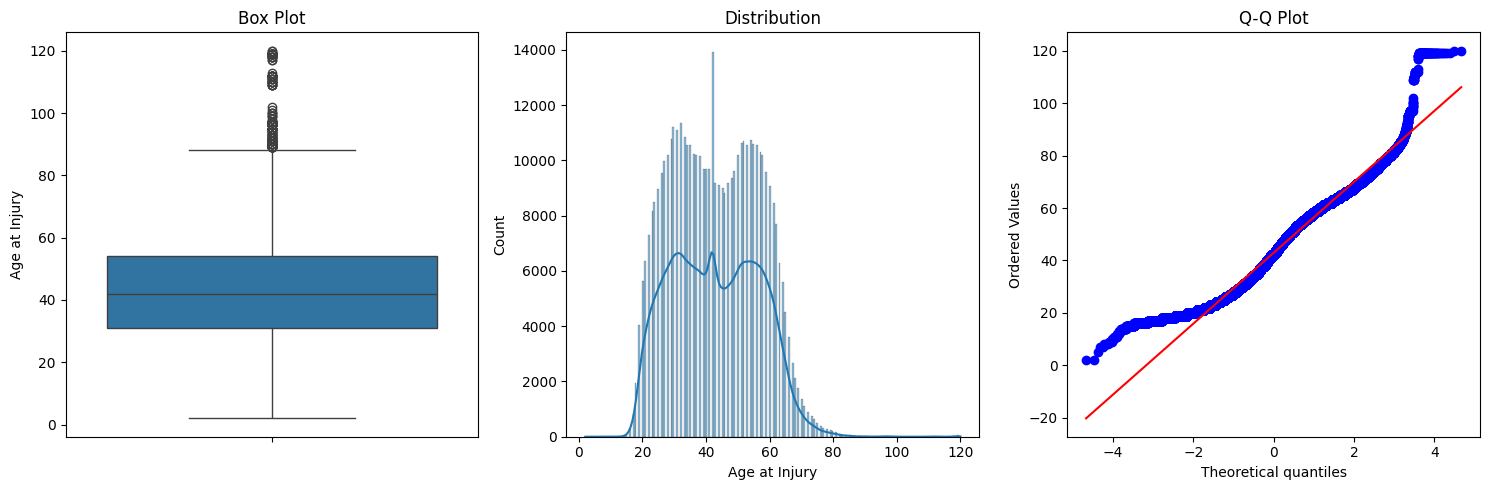


Visualizations for Assembly Date


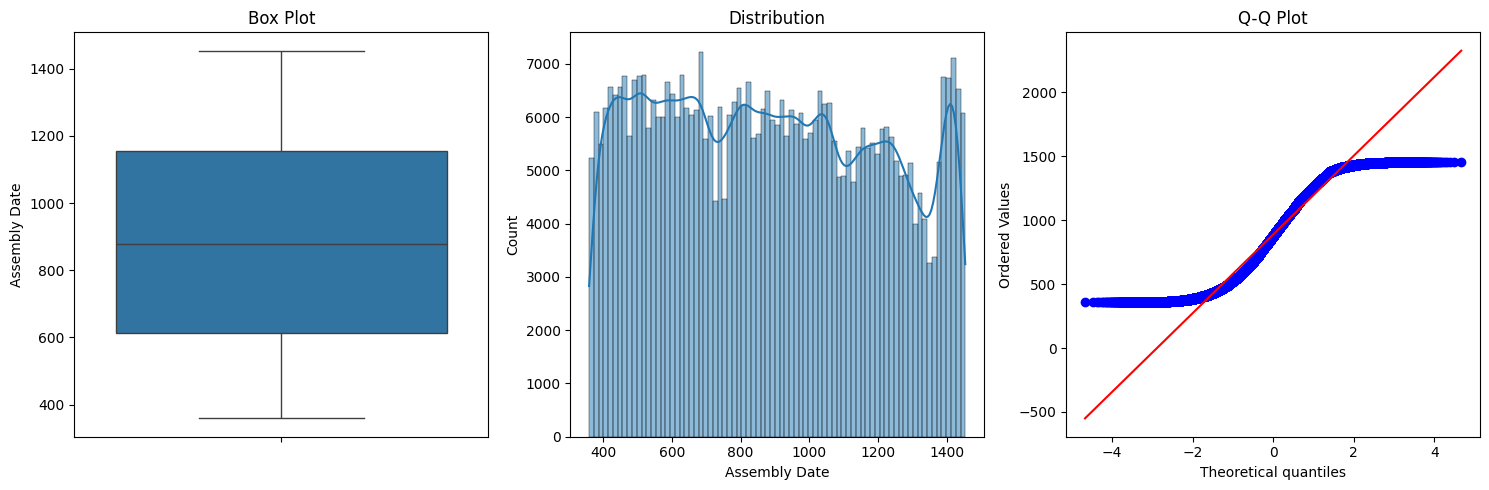


Visualizations for Average Weekly Wage


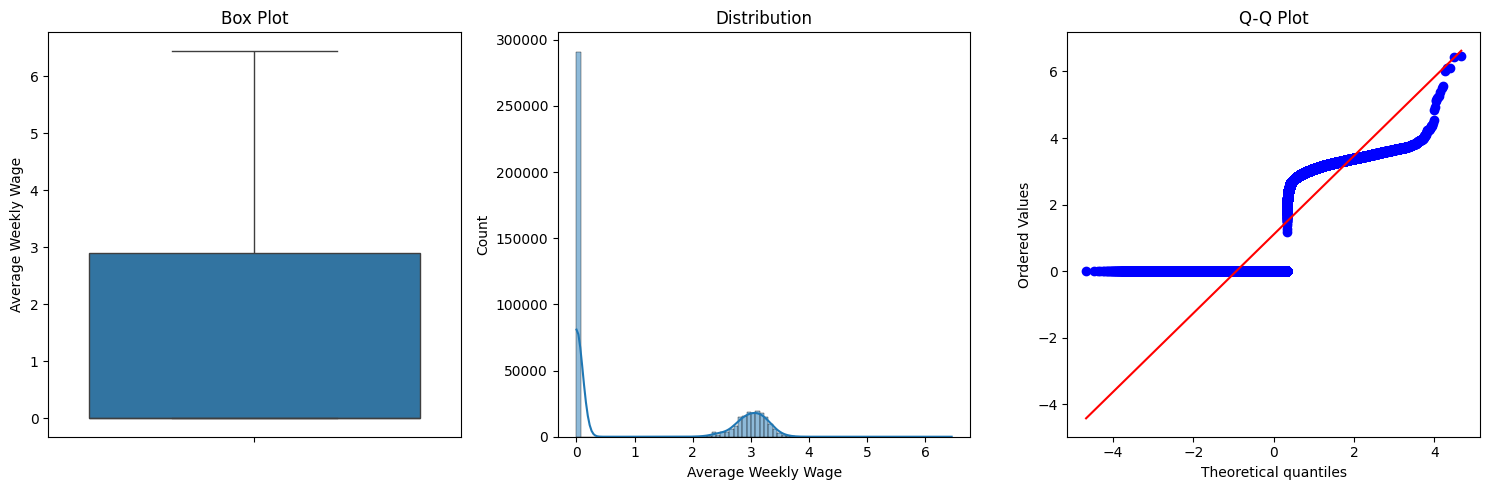


Visualizations for Birth Year


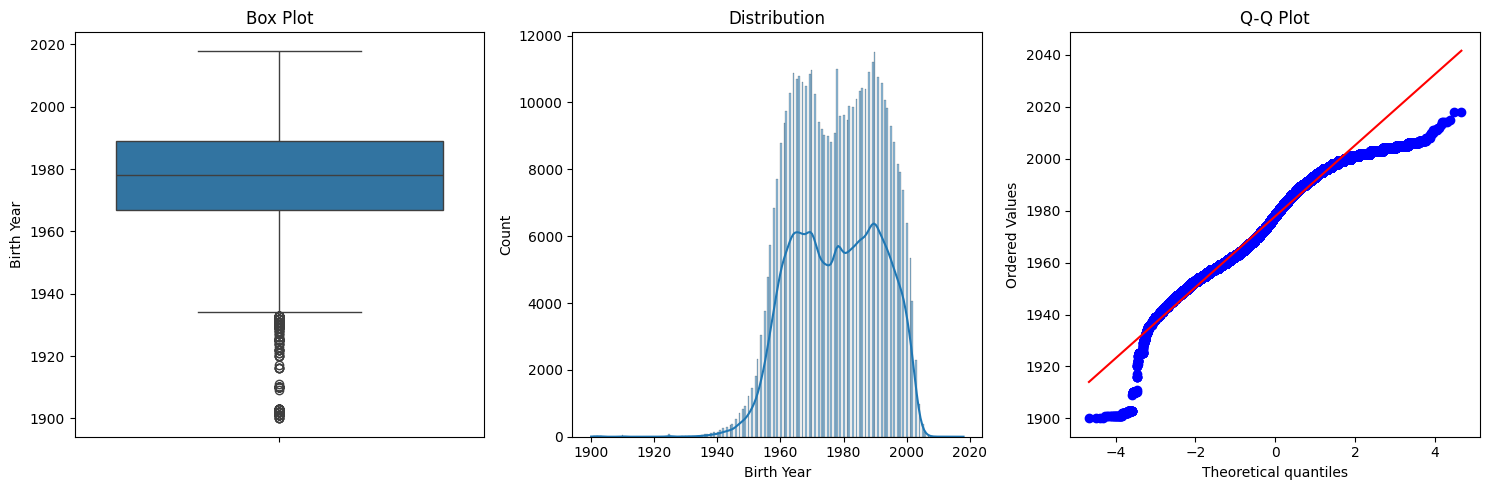


Visualizations for C-2 Date


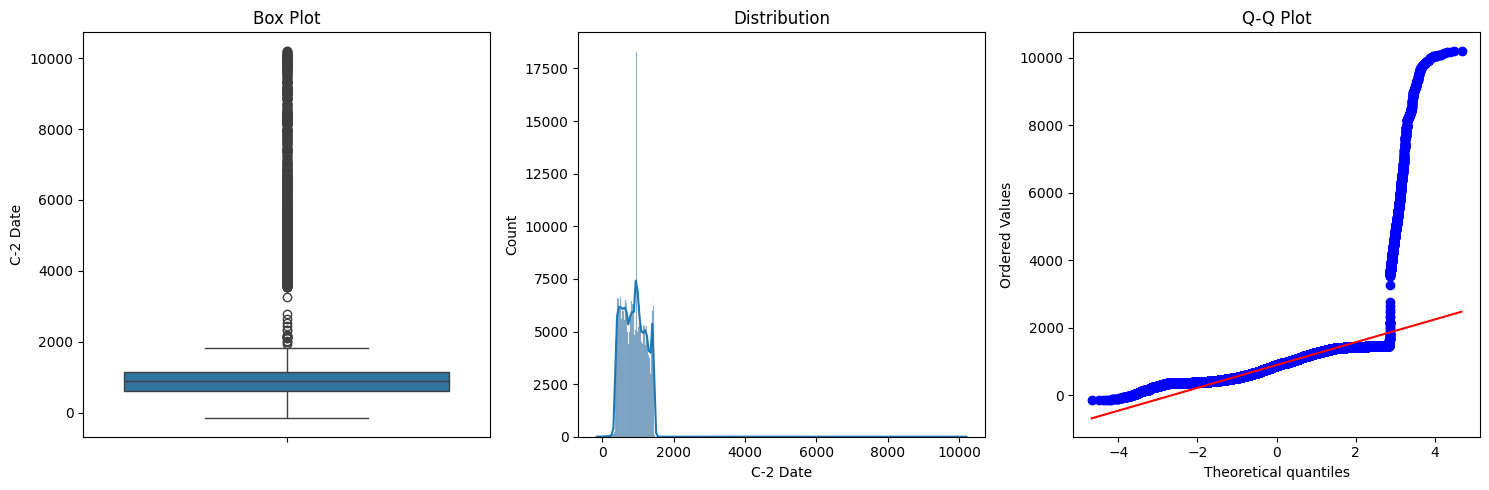


Visualizations for C-3 Date


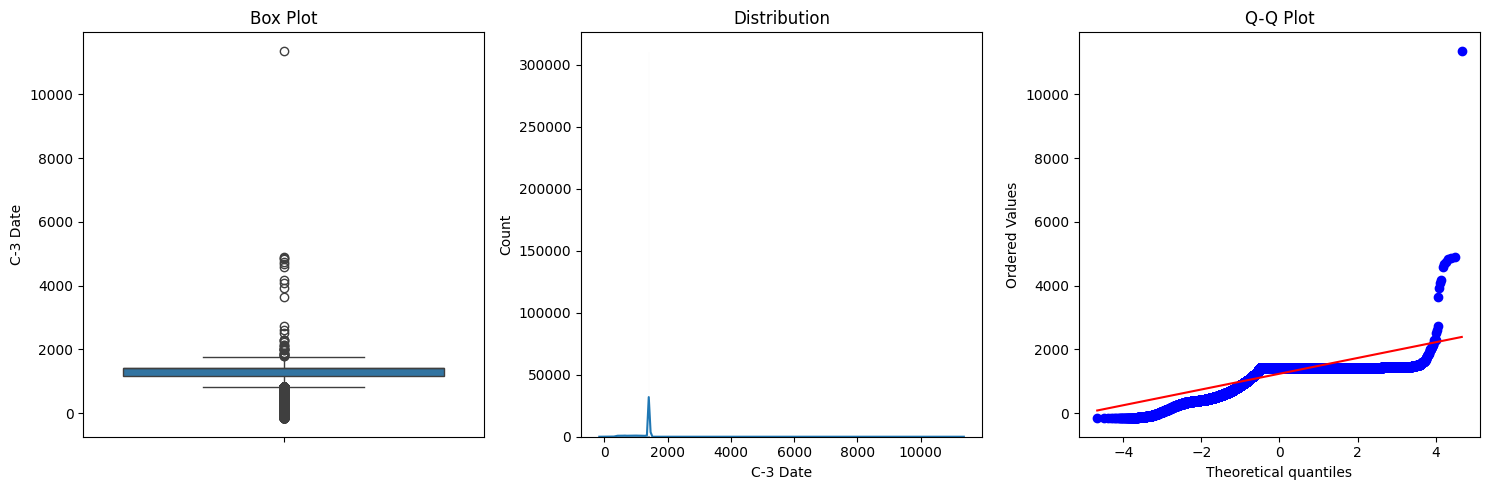


Visualizations for Carrier Type


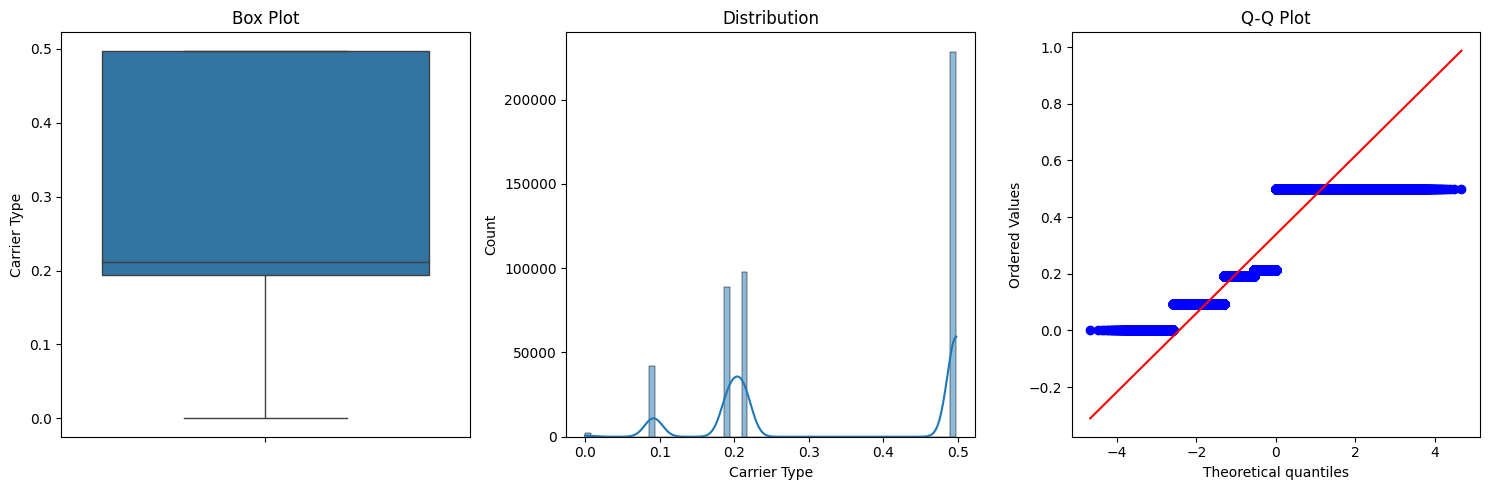


Visualizations for First Hearing Date


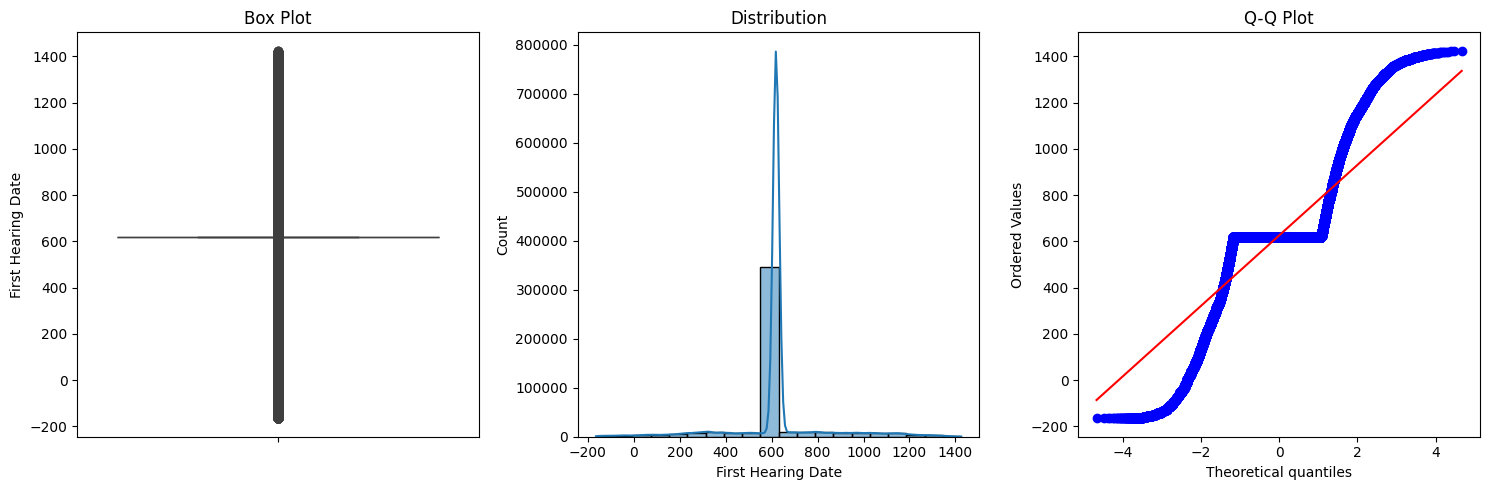


Visualizations for IME-4 Count


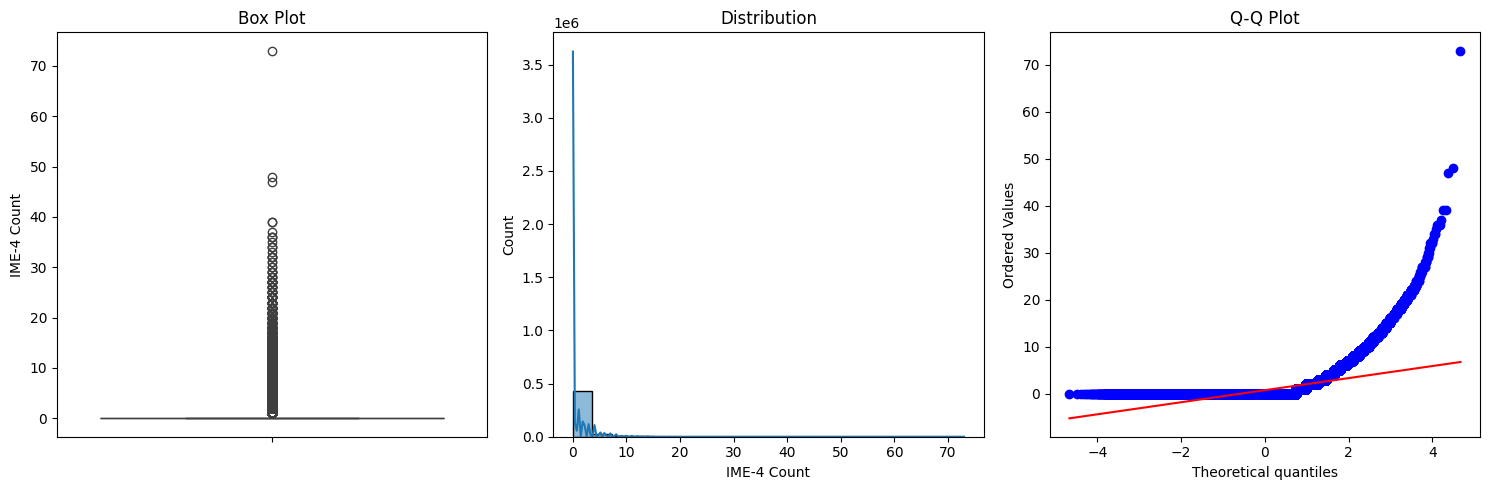


Visualizations for Industry Code


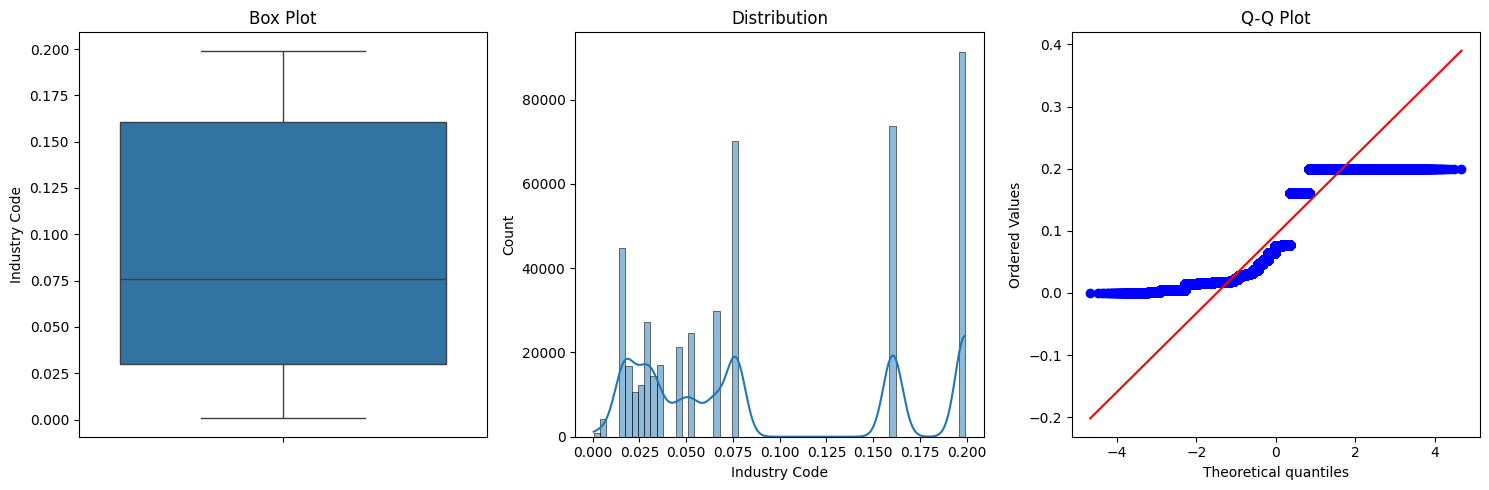


Visualizations for Medical Fee Region


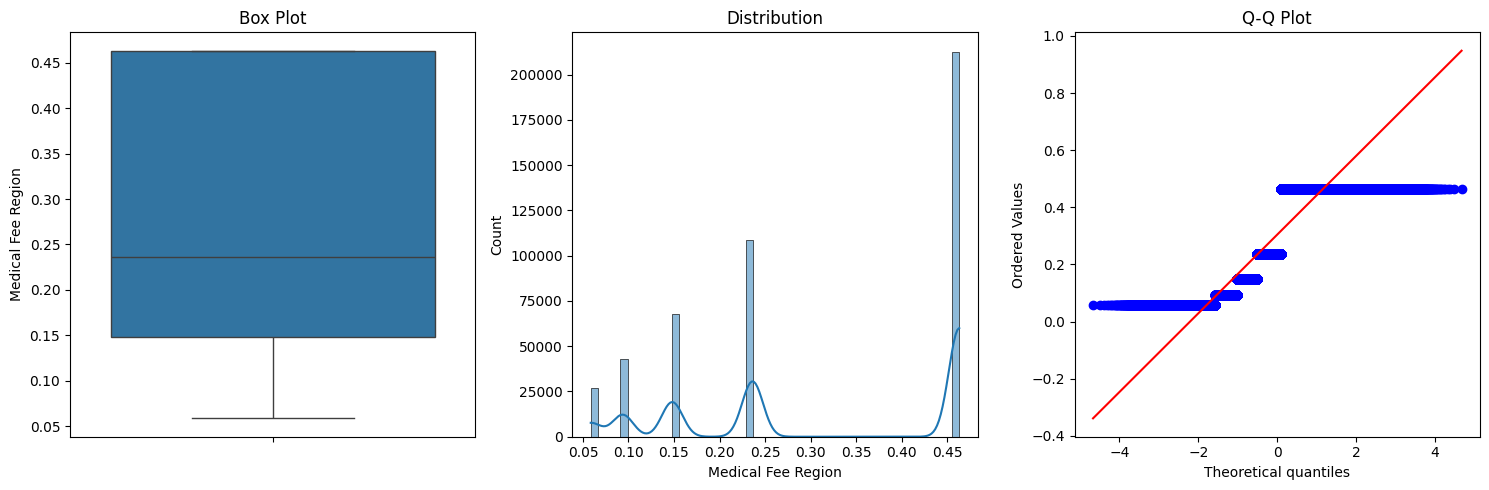


Visualizations for WCIO Cause of Injury Code


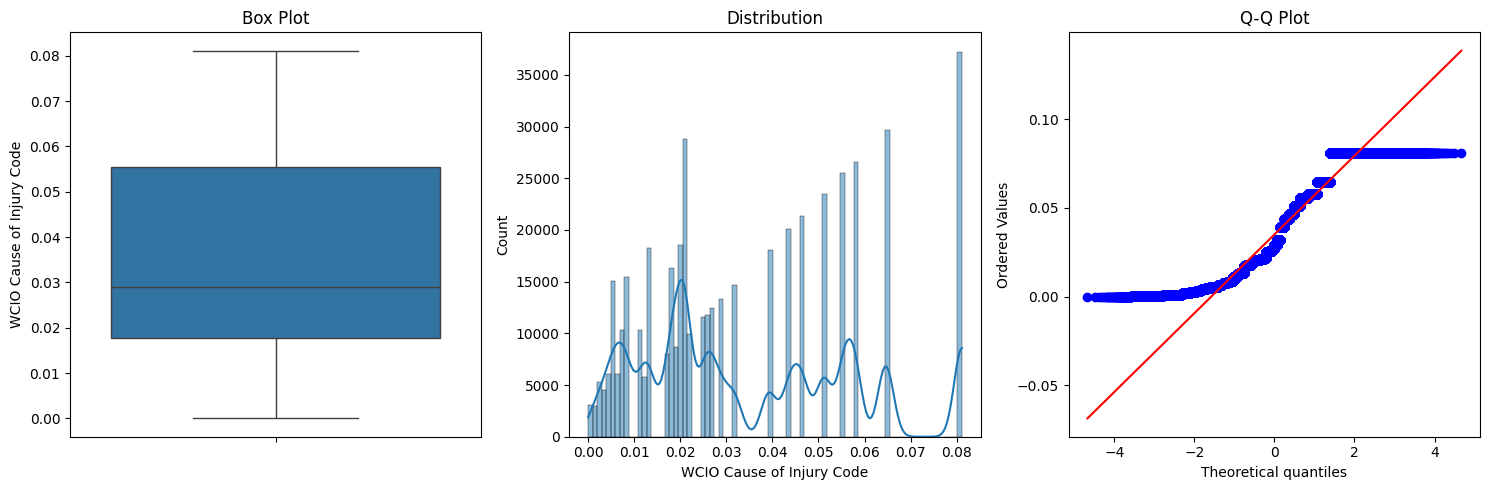


Visualizations for WCIO Nature of Injury Code


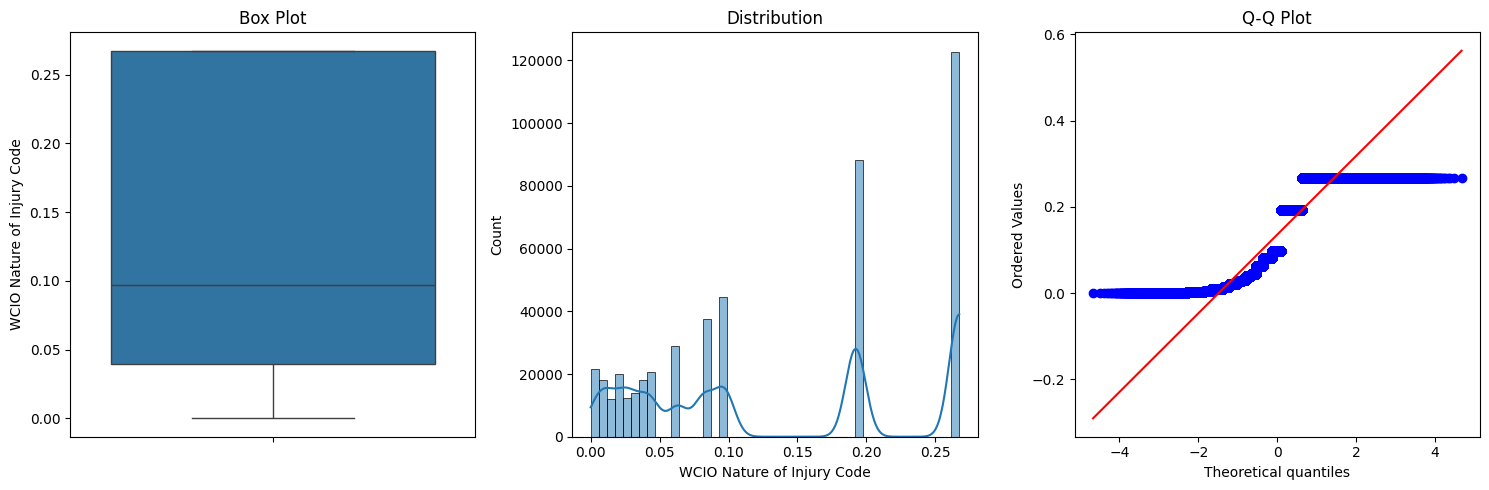


Visualizations for WCIO Part Of Body Code


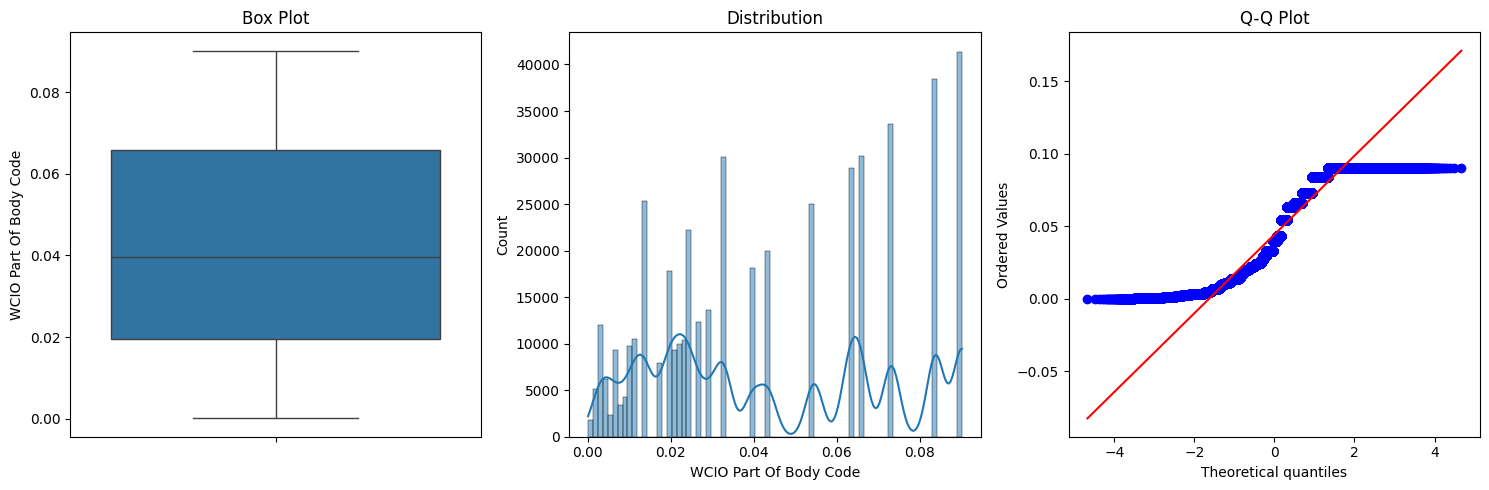


Visualizations for Agreement Reached


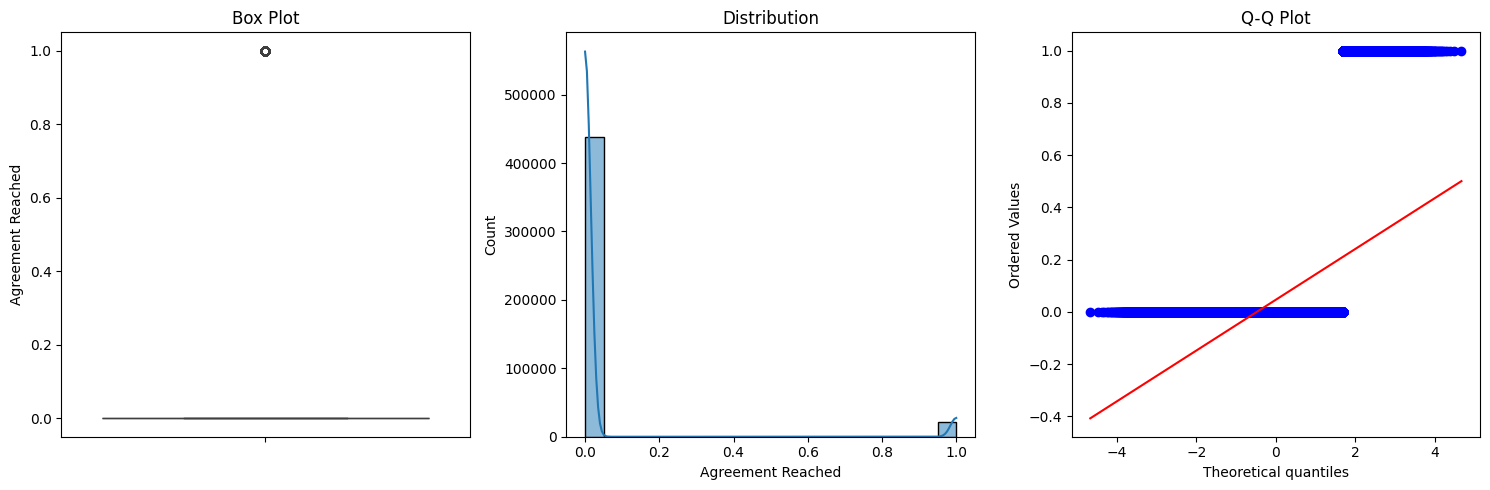


Visualizations for Number of Dependents


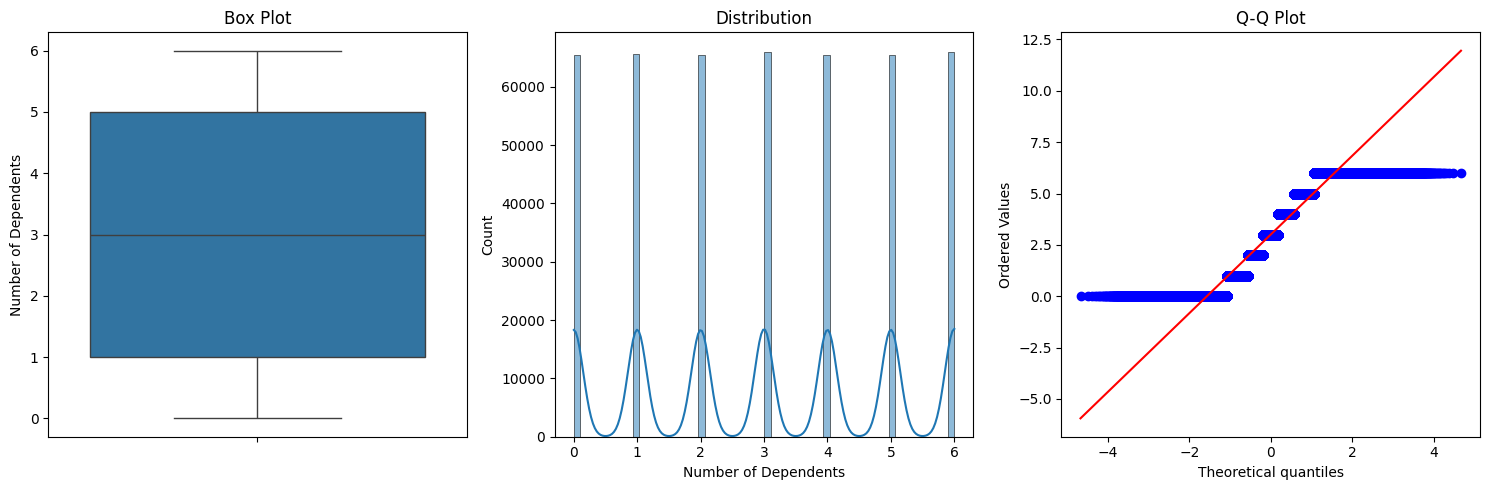


Visualizations for Accident Year


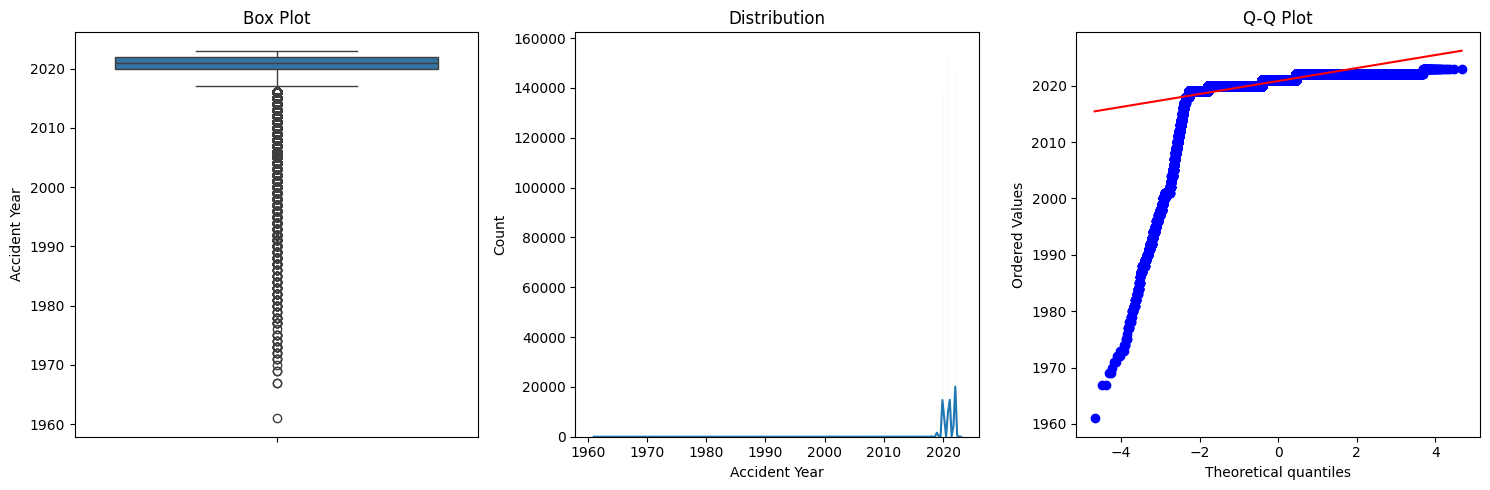


Visualizations for COVID-19 Indicator_Y


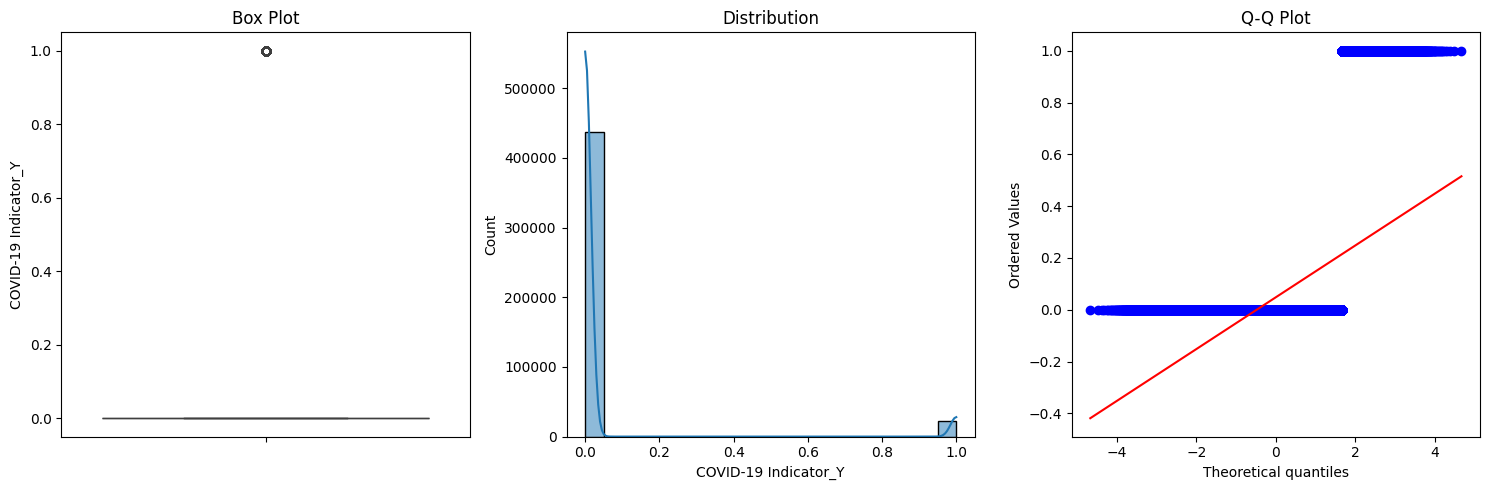


Visualizations for Alternative Dispute Resolution_U


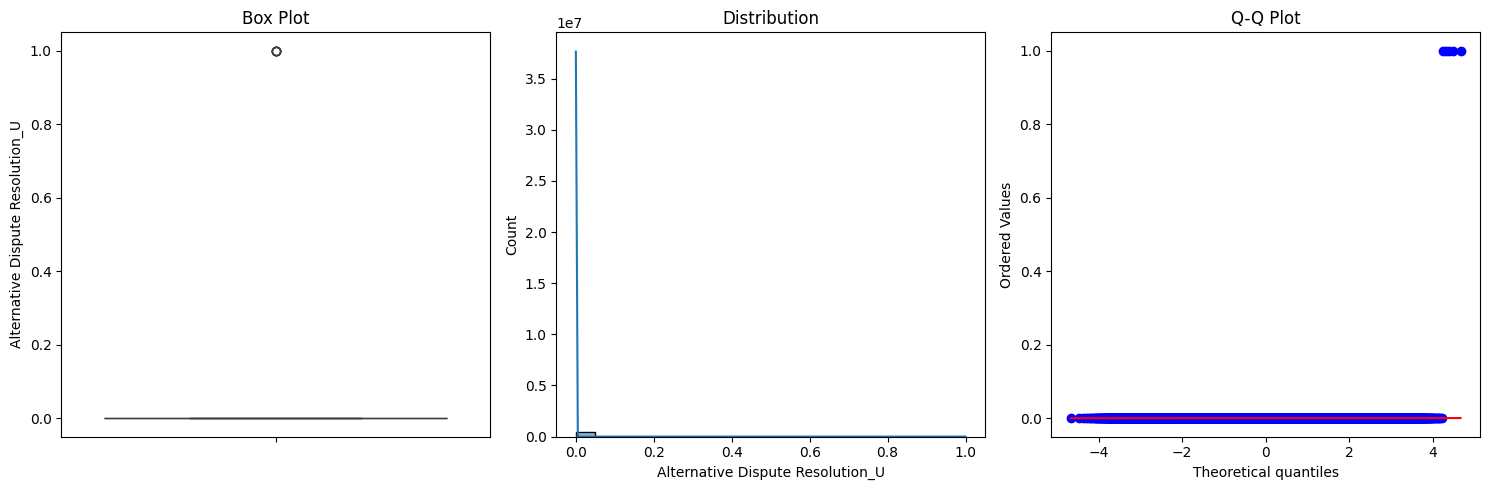


Visualizations for Alternative Dispute Resolution_Y


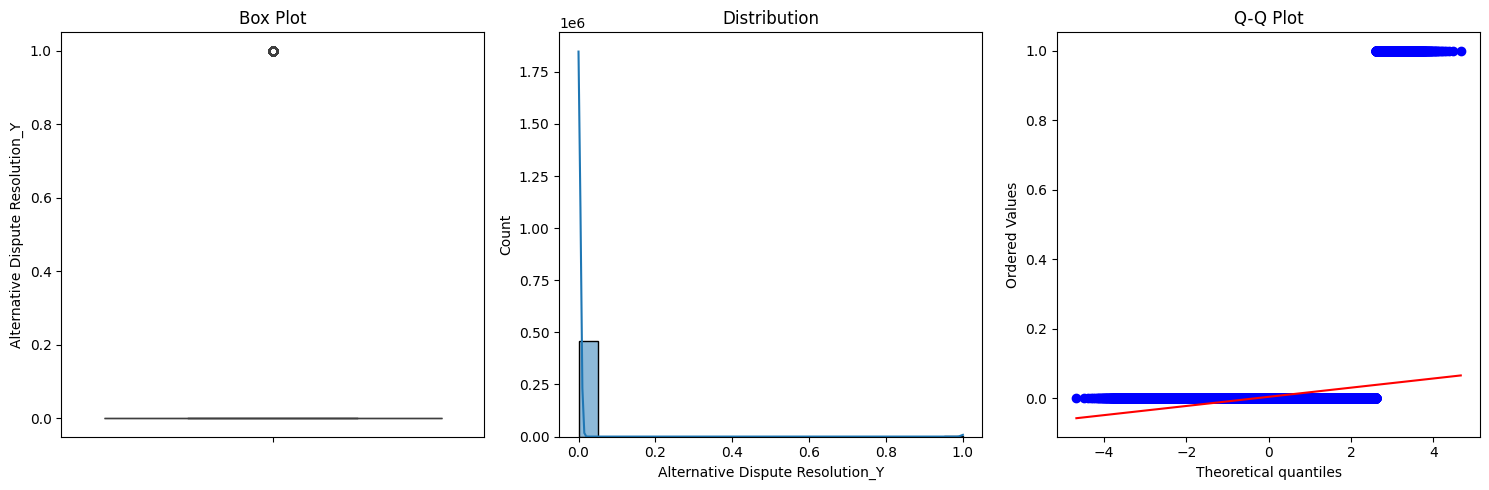

In [421]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_outliers(df, exclude_columns=None):
    """
    Generate detailed outlier analysis report for numeric columns

    Parameters:
    df (pandas.DataFrame): Input DataFrame
    exclude_columns (list): Columns to exclude from analysis
    """
    # Initialize results dictionary
    results = {}

    # Get numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if exclude_columns:
        numeric_cols = [col for col in numeric_cols if col not in exclude_columns]

    for column in numeric_cols:
        # Basic statistics
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate z-scores
        z_scores = np.abs(stats.zscore(df[column], nan_policy='omit'))

        # Calculate modified z-scores
        median = df[column].median()
        mad = stats.median_abs_deviation(df[column], nan_policy='omit')
        modified_z_scores = np.abs(0.6745 * (df[column] - median) / mad)

        # Identify outliers using different methods
        iqr_outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        z_score_outliers = z_scores > 3
        modified_z_outliers = modified_z_scores > 3.5

        # Get extreme values
        outlier_values = df[column][iqr_outliers].values

        results[column] = {
            'basic_stats': {
                'mean': df[column].mean(),
                'median': df[column].median(),
                'std': df[column].std(),
                'min': df[column].min(),
                'max': df[column].max(),
                'Q1': Q1,
                'Q3': Q3,
                'IQR': IQR
            },
            'outliers': {
                'IQR_method': {
                    'count': iqr_outliers.sum(),
                    'percentage': (iqr_outliers.sum() / len(df)) * 100,
                    'lower_bound': lower_bound,
                    'upper_bound': upper_bound
                },
                'Z_score': {
                    'count': z_score_outliers.sum(),
                    'percentage': (z_score_outliers.sum() / len(df)) * 100
                },
                'Modified_Z': {
                    'count': modified_z_outliers.sum(),
                    'percentage': (modified_z_outliers.sum() / len(df)) * 100
                }
            },
            'extreme_values': {
                'top_10': df[column].nlargest(10).to_dict(),
                'bottom_10': df[column].nsmallest(10).to_dict(),
                'outlier_summary': {
                    'count': len(outlier_values),
                    'unique_values': np.unique(outlier_values).tolist()[:10]  # First 10 unique outliers
                }
            }
        }

        # Add skewness and kurtosis
        results[column]['distribution'] = {
            'skewness': stats.skew(df[column].dropna()),
            'kurtosis': stats.kurtosis(df[column].dropna())
        }

    return results

def print_outlier_report(results):
    """Print formatted outlier analysis results"""
    print("\n=== DETAILED OUTLIER ANALYSIS REPORT ===\n")

    for column, stats in results.items():
        print(f"\n{'='*80}")
        print(f"COLUMN: {column}")
        print(f"{'='*80}")

        # Basic Statistics
        print("\n1. BASIC STATISTICS:")
        print(f"{'*'*20}")
        basic = stats['basic_stats']
        print(f"Mean: {basic['mean']:.2f}")
        print(f"Median: {basic['median']:.2f}")
        print(f"Standard Deviation: {basic['std']:.2f}")
        print(f"Range: [{basic['min']:.2f}, {basic['max']:.2f}]")
        print(f"IQR: {basic['IQR']:.2f} (Q1: {basic['Q1']:.2f}, Q3: {basic['Q3']:.2f})")

        # Distribution Characteristics
        print("\n2. DISTRIBUTION CHARACTERISTICS:")
        print(f"{'*'*20}")
        dist = stats['distribution']
        print(f"Skewness: {dist['skewness']:.2f}")
        print(f"Kurtosis: {dist['kurtosis']:.2f}")

        # Outlier Detection Results
        print("\n3. OUTLIER DETECTION:")
        print(f"{'*'*20}")
        out = stats['outliers']

        print("\nIQR Method:")
        print(f"- Count: {out['IQR_method']['count']}")
        print(f"- Percentage: {out['IQR_method']['percentage']:.2f}%")
        print(f"- Bounds: [{out['IQR_method']['lower_bound']:.2f}, {out['IQR_method']['upper_bound']:.2f}]")

        print("\nZ-Score Method (>3 std):")
        print(f"- Count: {out['Z_score']['count']}")
        print(f"- Percentage: {out['Z_score']['percentage']:.2f}%")

        print("\nModified Z-Score Method:")
        print(f"- Count: {out['Modified_Z']['count']}")
        print(f"- Percentage: {out['Modified_Z']['percentage']:.2f}%")

        # Extreme Values
        print("\n4. EXTREME VALUES:")
        print(f"{'*'*20}")
        ext = stats['extreme_values']

        print("\nTop 10 Highest Values:")
        for i, (idx, val) in enumerate(ext['top_10'].items(), 1):
            print(f"{i}. Index {idx}: {val:.2f}")

        print("\nBottom 10 Lowest Values:")
        for i, (idx, val) in enumerate(ext['bottom_10'].items(), 1):
            print(f"{i}. Index {idx}: {val:.2f}")

        print("\n")

# Execute the analysis
# Exclude binary and categorical columns
exclude_cols = ['Received_C2', 'Received_C3', 'Hearing_held', 'Gender_M',
                'Attorney/Representative_Y', 'COVID-19_Indicator_Y',
                'Alternative_Dispute_Resolution_U', 'Alternative_Dispute_Resolution_Y']

# Run analysis
outlier_results = analyze_outliers(train_numerical, exclude_columns=exclude_cols)

# Print report
print_outlier_report(outlier_results)

# Optional: Create visualizations for each numeric column
def plot_outlier_analysis(train_numerical, column):
    plt.figure(figsize=(15, 5))

    # Box plot
    plt.subplot(131)
    sns.boxplot(y=train_numerical[column])
    plt.title('Box Plot')

    # Histogram with KDE
    plt.subplot(132)
    sns.histplot(train_numerical[column], kde=True)
    plt.title('Distribution')

    # QQ plot
    plt.subplot(133)
    stats.probplot(train_numerical[column], dist="norm", plot=plt)
    plt.title('Q-Q Plot')

    plt.tight_layout()
    plt.show()

# Create plots for each numeric column
for column in outlier_results.keys():
    print(f"\nVisualizations for {column}")
    plot_outlier_analysis(train_numerical, column)

In [422]:
def handle_outliers_with_tracking(df):
    df_clean = df.copy()
    modifications = {}

    # Track modifications for each column
    for col in df_clean.columns:
        modifications[col] = {
            'original_count': len(df_clean),
            'modified_count': 0,
            'lower_bound': None,
            'upper_bound': None
        }

    # Date fields
    date_cols = ['C-2 Date', 'C-3 Date', 'First Hearing Date']
    for col in date_cols:
        lower_bound = df_clean[col].quantile(0.001)
        upper_bound = df_clean[col].quantile(0.999)
        lower_mask = df_clean[col] < lower_bound
        upper_mask = df_clean[col] > upper_bound

        df_clean.loc[lower_mask, col] = lower_bound
        df_clean.loc[upper_mask, col] = upper_bound

        modifications[col].update({
            'modified_count': (lower_mask | upper_mask).sum(),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        })

    # Age related
    age_lower = df_clean['Age at Injury'].quantile(0.001)
    age_upper = df_clean['Age at Injury'].quantile(0.999)
    age_lower_mask = df_clean['Age at Injury'] < age_lower
    age_upper_mask = df_clean['Age at Injury'] > age_upper

    df_clean.loc[age_lower_mask, 'Age at Injury'] = age_lower
    df_clean.loc[age_upper_mask, 'Age at Injury'] = age_upper

    modifications['Age at Injury'].update({
        'modified_count': (age_lower_mask | age_upper_mask).sum(),
        'lower_bound': age_lower,
        'upper_bound': age_upper
    })

    # Birth Year
    birth_lower = df_clean['Birth Year'].quantile(0.001)
    birth_upper = df_clean['Birth Year'].quantile(0.999)
    birth_lower_mask = df_clean['Birth Year'] < birth_lower
    birth_upper_mask = df_clean['Birth Year'] > birth_upper

    df_clean.loc[birth_lower_mask, 'Birth Year'] = birth_lower
    df_clean.loc[birth_upper_mask, 'Birth Year'] = birth_upper

    modifications['Birth Year'].update({
        'modified_count': (birth_lower_mask | birth_upper_mask).sum(),
        'lower_bound': birth_lower,
        'upper_bound': birth_upper
    })

    # IME-4 Count
    ime_lower = df_clean['IME-4 Count'].quantile(0.025)
    ime_upper = df_clean['IME-4 Count'].quantile(0.975)
    ime_lower_mask = df_clean['IME-4 Count'] < ime_lower
    ime_upper_mask = df_clean['IME-4 Count'] > ime_upper

    df_clean.loc[ime_lower_mask, 'IME-4 Count'] = ime_lower
    df_clean.loc[ime_upper_mask, 'IME-4 Count'] = ime_upper

    modifications['IME-4 Count'].update({
        'modified_count': (ime_lower_mask | ime_upper_mask).sum(),
        'lower_bound': ime_lower,
        'upper_bound': ime_upper
    })

    # Average Weekly Wage
    wage_lower = df_clean['Average Weekly Wage'].quantile(0.0025)
    wage_upper = df_clean['Average Weekly Wage'].quantile(0.9975)
    wage_lower_mask = df_clean['Average Weekly Wage'] < wage_lower
    wage_upper_mask = df_clean['Average Weekly Wage'] > wage_upper

    df_clean.loc[wage_lower_mask, 'Average Weekly Wage'] = wage_lower
    df_clean.loc[wage_upper_mask, 'Average Weekly Wage'] = wage_upper

    modifications['Average Weekly Wage'].update({
        'modified_count': (wage_lower_mask | wage_upper_mask).sum(),
        'lower_bound': wage_lower,
        'upper_bound': wage_upper
    })

    return df_clean, modifications

In [423]:
train_clean = handle_outliers(train_set)
val_clean = handle_outliers(val_set)
test_clean = handle_outliers(test)

<ipython-input-252-f80cfa6b11d2>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5619.343000000226' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df_clean[col] > upper_bound, col] = upper_bound
<ipython-input-252-f80cfa6b11d2>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.218999999999994' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df_clean[col] < lower_bound, col] = lower_bound
<ipython-input-252-f80cfa6b11d2>:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5468.940000000162' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df_clean[col] > upper_bound, col] = upper_bo

In [424]:
train_clean

,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,District Name,First Hearing Date,IME-4 Count,Industry Code,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Accident Year,Received_C2,Received_C3,Hearing_held,Attorney/Representative_Y,COVID-19 Indicator_Y,Alternative Dispute Resolution_U,Alternative Dispute Resolution_Y,Gender_M
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5785935,50.0,867,2.872191,1971.0,867.0,847.0,PROPERTY AND CASUALTY,0.497548,QUEENS,NYC,619,2.0,0.017597,0.463375,0.051126,0.063035,0.090122,11432,0.0,6.0,2021.0,1,1,1,1,0,0,0,0
5980545,31.0,602,3.063832,1991.0,604.0,1414.0,HEALTH & HOSPITAL CORP.,0.212179,BRONX,NYC,350,0.0,0.199081,0.463375,0.039230,0.010374,0.073124,10451,0.0,2.0,2022.0,1,1,1,0,0,0,0,0
5552635,44.0,1207,0.000000,1976.0,1207.0,1414.0,AMERICAN ZURICH INSURANCE CO,0.497548,KINGS,NYC,619,0.0,0.029226,0.463375,0.005629,0.267488,0.032729,11203,0.0,3.0,2020.0,1,1,1,0,0,0,0,1
5758039,25.0,906,0.000000,1996.0,906.0,1414.0,"NORDSTROM, INC.",0.091843,KINGS,NYC,619,0.0,0.075944,0.463375,0.018845,0.192304,0.013745,11237,0.0,1.0,2021.0,1,1,1,0,0,0,0,1
5951382,42.0,640,2.399674,1980.0,635.0,650.0,NEW YORK BLACK CAR OPERATORS',0.091843,NASSAU,NYC,362,0.0,0.065062,0.463375,0.029073,0.097106,0.073124,11003,0.0,4.0,2022.0,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5837651,26.0,797,3.095365,1995.0,797.0,775.0,INDEMNITY INSURANCE CO OF,0.497548,WESTCHESTER,NYC,700,1.0,0.199081,0.093731,0.007646,0.004915,0.014207,10805,0.0,6.0,2021.0,1,1,1,1,0,0,0,1
5781926,55.0,873,2.986888,1966.0,873.0,858.0,REDWOOD FIRE & CASUALTY,0.497548,QUEENS,NYC,658,6.0,0.199081,0.463375,0.064603,0.192304,0.039561,11429,0.0,1.0,2021.0,1,1,1,1,0,0,0,1
5890060,57.0,720,2.900416,1964.0,720.0,1414.0,UTICA MUTUAL INS CO,0.497548,ERIE,BUFFALO,619,0.0,0.023039,0.236296,0.020729,0.267488,0.083779,14127,0.0,5.0,2021.0,1,1,1,0,0,0,0,0


In [425]:
def scale_features(df_clean):
    """
    Scale features using appropriate methods based on their distributions and characteristics.
    """
    df_scaled = df_clean.copy()
    scalers = {}

    # 1. Log transform right-skewed continuous variables
    df_scaled['Average Weekly Wage'] = np.log1p(df_scaled['Average Weekly Wage'])
    df_scaled['IME-4 Count'] = np.log1p(df_scaled['IME-4 Count'])

    # 2. StandardScaler for normal-like distributions
    normal_features = ['Age at Injury', 'Birth Year', 'Number of Dependents']
    for feature in normal_features:
        scalers[feature] = StandardScaler()  # Create new scaler for each feature
        df_scaled[feature] = scalers[feature].fit_transform(df_scaled[[feature]])

    # 3. RobustScaler for date fields
    date_features = ['Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
    for feature in date_features:
        scalers[feature] = RobustScaler()  # Create new scaler for each feature
        df_scaled[feature] = scalers[feature].fit_transform(df_scaled[[feature]])

    return df_scaled, scalers

def apply_scaling(df, scalers):
    """Apply pre-fitted scalers to new data"""
    df_scaled = df.copy()

    # Log transform
    df_scaled['Average Weekly Wage'] = np.log1p(df_scaled['Average Weekly Wage'])
    df_scaled['IME-4 Count'] = np.log1p(df_scaled['IME-4 Count'])

    # Apply standard scaling
    normal_features = ['Age at Injury', 'Birth Year', 'Number of Dependents', 'Accident Year',  'First Hearing Date']
    for feature in normal_features:
        if feature in df_scaled.columns:  # Check if feature exists
            df_scaled[feature] = scalers[feature].transform(df_scaled[[feature]])

    # Apply robust scaling
    date_features = ['Assembly Date', 'C-2 Date', 'C-3 Date']
    for feature in date_features:
        if feature in df_scaled.columns:  # Check if feature exists
            df_scaled[feature] = scalers[feature].transform(df_scaled[[feature]])

    return df_scaled

In [426]:
# Execute scaling pipeline
train_scaled, scalers = scale_features(train_clean)
val_scaled = apply_scaling(val_clean, scalers)
test_scaled = apply_scaling(test_clean, scalers)



KeyError: 'Accident Year'

In [ ]:

train_scaled

In [ ]:
val_full = pd.merge(y, val_scaled, on='Claim Identifier', how='right')

train_full = pd.merge(y, train_scaled, on='Claim Identifier', how='right')

val_full = val_full.drop(columns=['Alternative Dispute Resolution_U'], errors='ignore')
train_full = train_full.drop(columns=['Alternative Dispute Resolution_U'], errors='ignore')

In [ ]:
train_full

In [ ]:
# Save to CSV
train_full.to_csv('traindf.csv', index=False)
val_full.to_csv('valdf.csv', index=False)
test_scaled.to_csv('testdf.csv', index=False)